## 1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
###Сделать обзорный анализ выбранного датасета
###Сделать feature engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import itertools

import matplotlib.pyplot as plt

%matplotlib inline

Информация о наборе данных:

Существует 10 предикторов, все количественные, и бинарная зависимая переменная, указывающая на наличие или отсутствие рака молочной железы.
Предикторами являются антропометрические данные и параметры, которые могут быть собраны при обычном анализе крови.
Модели прогнозирования, основанные на этих предикторах, если они точны, потенциально могут быть использованы в качестве биомаркера рака молочной железы.


Атрибутивная информация:

Количественные признаки:
Возраст (годы)
ИМТ (кг/м2)
Глюкоза (мг/дл)
Инсулин (мкг/мл)
ХОМА
Лептин (нг/мЛ)
Адипонектин (мкг/мл)
Резистин (нг/мл)
MCP-1 (пг/дл)

Классификация:
1=Здоровый контроль
2=Пациенты

Ссылка https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra#

In [2]:
df = pd.read_csv("dataR2.csv")
df.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [4]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [5]:
df['Classification'] = df['Classification'].apply(lambda x: 0 if x == 2 else 1)

In [6]:
cat_col = ['Age']
feature_col = ['BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_norm = df.copy()
df[feature_col] = scaler.fit_transform(df_norm[feature_col])

In [8]:
df.head(3)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251,1
1,83,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224,1
2,82,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Classification']), df['Classification'], test_size=0.25, random_state=5)

In [10]:
X_train = X_train[cat_col + feature_col]
X_test = X_test[cat_col + feature_col]

## 2. Обучить любой классификатор (какой вам нравится)

In [11]:
import xgboost as xgb

model = xgb.XGBClassifier()

In [12]:
# обучим модель
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [13]:
# наши прогнозы для тестовой выборки
preds = model.predict(X_test)
preds[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [14]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix

In [15]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')

Best Threshold=1, F-Score=0.733, Precision=0.688, Recall=0.786


In [16]:
roc_auc = roc_auc_score(y_test, preds)
roc_auc

0.7261904761904762

## 3.  разобраться с SHAP и построить важности признаков для:
- всего тестового набора данных (summary_plot - дать интерпретацию)
- для топ 10%

In [17]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 18.5 MB/s eta 0:00:00


In [18]:
import shap

explainer = shap.TreeExplainer(model)

In [19]:
preds_train = model.predict_proba(X_train)[:, 1]
preds_train

array([0.03395045, 0.0178551 , 0.01247167, 0.97589236, 0.995082  ,
       0.9686138 , 0.97937006, 0.06298437, 0.98427445, 0.967254  ,
       0.895228  , 0.00375273, 0.9698592 , 0.0145928 , 0.00906494,
       0.05438523, 0.91813797, 0.00504181, 0.02619684, 0.03471632,
       0.12446653, 0.9852992 , 0.9965487 , 0.9853866 , 0.97894716,
       0.00567703, 0.9946709 , 0.03197752, 0.10430045, 0.017947  ,
       0.01580007, 0.00870469, 0.9516096 , 0.9735303 , 0.9803638 ,
       0.00321529, 0.00228353, 0.10040831, 0.00747284, 0.9399879 ,
       0.8257591 , 0.01551619, 0.9702575 , 0.8924694 , 0.00306094,
       0.96840996, 0.9813442 , 0.97306687, 0.9659264 , 0.12742881,
       0.9034388 , 0.13650216, 0.04971589, 0.02457383, 0.9846757 ,
       0.1043301 , 0.91900605, 0.9959966 , 0.93574244, 0.02291183,
       0.0044335 , 0.02188548, 0.9796495 , 0.01784348, 0.00494024,
       0.01228039, 0.945575  , 0.12402554, 0.04402364, 0.02664303,
       0.99398094, 0.03758764, 0.8671743 , 0.01446641, 0.90912

In [20]:
%%time
shap_values_all = explainer.shap_values(X_train)

CPU times: user 52.3 ms, sys: 704 µs, total: 53 ms
Wall time: 119 ms


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [21]:
features = df.columns[:-1]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


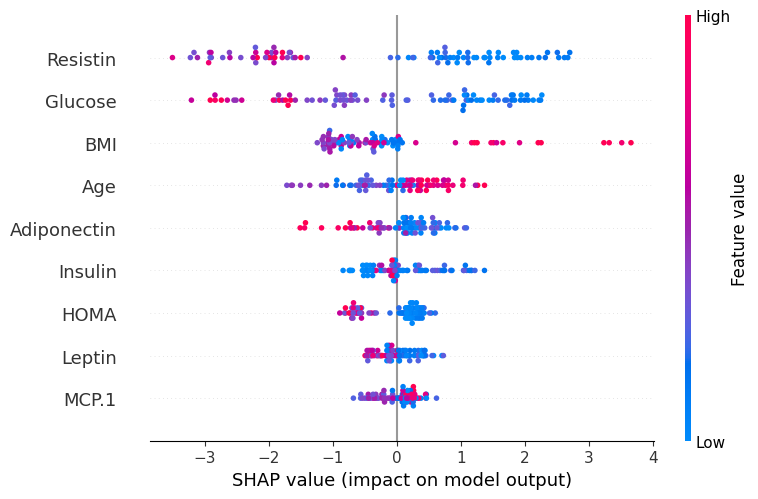

In [22]:
shap.summary_plot(shap_values_all, X_train, feature_names=features)

1. Чем ниже уровень резистина и глюкозы, тем выше отток.
2. Чем выше индекс массы тела, тем ниже отток.
3. Чем больше возраст, тем меньше отток.
4. Чем ниже уровень адипонектина, тем выше отток.

In [23]:
sorted_indices = np.argsort(preds_train)[::-1] 
top_10_percent_indices = sorted_indices[:int(len(X_train) * 0.1)]

In [24]:
shap_values_10_percent = explainer.shap_values(X_train.iloc[top_10_percent_indices])

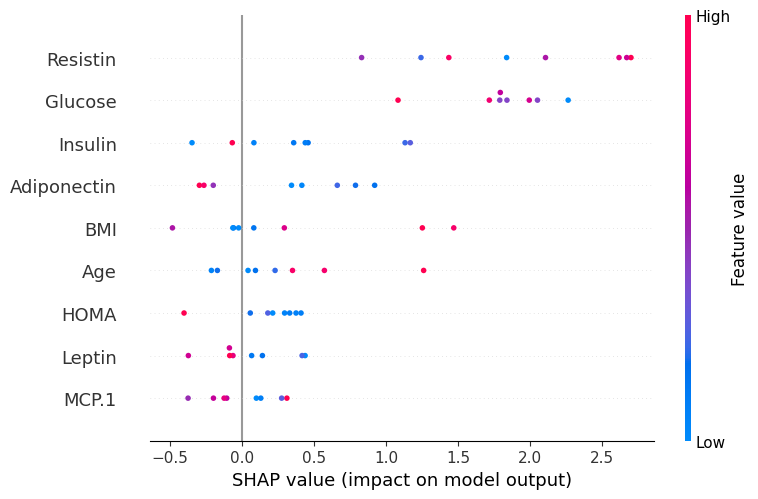

In [25]:
shap.summary_plot(shap_values_10_percent, X_train.iloc[top_10_percent_indices], feature_names=features)

In [26]:
# visualize the first prediction's explanation
shap.initjs()
idx = 66
print('pred is', preds_train[idx])
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], features=X_train.iloc[idx,:], feature_names=features)

pred is 0.945575


Человек скорее всего не уйдет в отток, т.к
1. Высокий уровень глюкозы, лептина.
2. Высокий индекс массы тела.

In [27]:
# visualize the first prediction's explanation
shap.initjs()
idx = 15
print('pred is', preds_train[idx])
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], features=X_train.iloc[idx,:], feature_names=features)

pred is 0.054385226


Человек скорее всего уйдет в отток, т.к
1. Низкий уровень глюкозы, резистина, инсулина и инсулинорезистентности.
2. Нормальный индекс массы тела.
3. Средний возраст.

In [28]:
# visualize the first prediction's explanation
shap.initjs()
idx = 82
print('pred is', preds_train[idx])
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], features=X_train.iloc[idx,:], feature_names=features)

pred is 0.015200508


Человек скорее всего уйдет в отток, т.к
1. Низкий уровень резистина, глюкозы, инсулинорезистентности, лептина.
2. В норме индекс массы тела.